 Transient rates 
---

# Initial imports

In [1]:
from hoki import load
import pandas as pd
import matplotlib.pyplot as plt

# Feel free to use your own style sheet
plt.style.use('tuto.mplstyle')

%matplotlib inline

---

### In this tutorial you will:

- Load BPASS transient rates from hoki
- Combine single and binary population transient rates
- Calculate total Core Collapse Supernovae rates
- Make sure the rates are in the right units
- Plot the rates of Type Ia SNe, CCSNe, LGRBs, and PISNe together. 


---

# Loading in the data and initial set-up

Transient rates in BPASS are one of the several types of stellar population outputs. We can simply use the `hoki.load.population_ouput()` function to laod the data. The function will automatically know what type of data it is loading from the file name and create an appropriate data frame to put it in. 

If you are not familiar with `pandas` and `pandas.DataFrame`, you should pick it up easily. If you want to look into them more check out this [Data Camp article](https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python).

In this tutorial we want to plot the rates corresponding to the stellar populations that include binary systems for a standard (Salpeter) IMF with slope -1.35 from 0.1 to 0.5 M_sun and a maximum mass of 300 solar masses, all of this at a tenth solar metalicity (so Z=0.002):
> `supernova-bin-imf135_300.z002.dat`

In [2]:
# Loading the binary and single star population transient rates.
# Note we chose this particular IMF and metallicity in order to reproduce the plot
# shown on the left hand sife of Figure 1 in Eldridge et al. 2018 

bin_rates = load.model_output('supernova-bin-imf135_300.z002.dat')

Let's have a look at one of our data frames

In [3]:
bin_rates.head()

,log_age,Ia,IIP,II,Ib,Ic,LGRB,PISNe,low_mass,e_Ia,e_IIP,e_II,e_Ib,e_Ic,e_LGRB,e_PISNe,e_low_mass,age_yrs
0,6.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,1122019.00
1,6.1,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,290520.12
2,6.2,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,365743.12
3,6.3,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,460443.62
4,6.4,0.0,0.0,0.0,3.847896,0.0,0.0,5.109734,0.0,0.0,0.0,0.0,0.496761,0.0,0.0,0.80792,0.0,579664.00


Most column names are pretty self-explanatory, appart from `low_mass`, which just detones the rate of low-mass supernovae (< 2M$_{\odot}$).  The `age_yrs` bin is th size of each time bin in years; indeed since BPASS works in log(time) space, each time bin has a different width in years. 

If you need more detail on each of these rates, you should have a look at the [BPASS user manual](https://bpass.auckland.ac.nz/8/files/bpassv2_1_manual_accessible_version.pdf).

In [4]:
# The last time bin in BPASS does some weird stuff so it's better to just ignore it. 
bin_rates = bin_rates[:-1]

In [5]:
# We are going to use the log_age and the size of the bin in years a lot, so I'm just renaming them for ease.
age = bin_rates.log_age.values
bin_size = bin_rates.age_yrs.values

### Core Collapse Supernovae rates

Core collapse supernovae comprise the type IIP, II, Ib and Ic. To get the total rate we need to sum these columns as well as put the single star and binary populations together.


In [6]:
ccsne = ( bin_rates[['IIP', 'II', 'Ib', 'Ic']].sum(axis=1))

# Getting the Units right

We want to plot our rates as **events/M$_{\odot}$/year**, this means we need to normalise by the total mass and the number of years in each time bin. 

BPASS calulates stellar populations with 10$^6$ M$_{\odot}$ and we've already put the bin size in years in a convenient variable called `bin_size`.

In [7]:
ccsne_norm = ccsne/bin_size/(10**6)
typeIa_norm = bin_rates.Ia.values /bin_size/(10**6)
lgrbs_norm = bin_rates.LGRB.values /bin_size/(10**6)
pisne_norm = bin_rates.PISNe.values/bin_size/(10**6)

# Plotting the transient rates

Now we have everything we need to plot our transient rates! The only trick here is to remember to **log rate axis** to be able to see everything. 

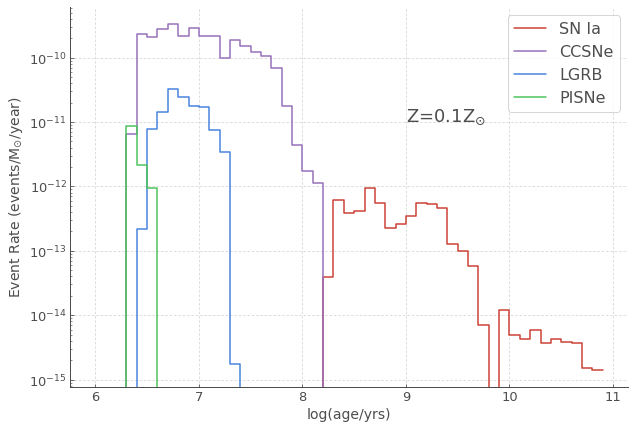

In [8]:
plt.figure(figsize = (10,7))

plt.step(age, typeIa_norm, label='SN Ia')
plt.step(age, ccsne_norm, label='CCSNe')
plt.step(age, lgrbs_norm, label='LGRB')
plt.step(age, pisne_norm, label='PISNe')

plt.yscale("log")

plt.text(9, 10**(-11), r"Z=0.1Z$_{\odot}$", fontsize=18)

plt.ylabel(r"Event Rate (events/M$_{\odot}$/year)")
plt.xlabel("log(age/yrs)")
plt.legend(fontsize=16)